In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
from scipy import stats
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpl_patches
from scipy.stats import spearmanr
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec

In [2]:
df=pd.read_table('FigS3.csv',sep='\t')
df.head()

,Sample,Population,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mn,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn
0,Agl-0,Morocco,51.5990,27582.1750,0.6660,0.0870,7.3980,70.9530,42185.7345,0.9180,...,151.7620,0.3160,1037.2595,0.0665,12236.7845,0.5230,9.6940,9884.4000,24.2590,158.1300
1,Agl-1,Morocco,55.4765,31317.5225,0.5730,0.0875,7.7920,79.7015,47014.0865,0.8495,...,136.6825,0.2625,650.2930,0.0860,11810.1900,0.3920,9.8375,7583.0005,22.0250,118.5570
2,Agl-2,Morocco,61.7540,31268.3055,0.4465,0.0935,8.2960,79.0375,44988.7905,0.9130,...,146.7160,0.2065,953.0160,0.1350,11746.4430,0.6425,8.5245,9493.5160,27.7300,115.4375
3,Agl-3,Morocco,51.2975,27565.3400,0.4585,0.0830,6.3090,77.4200,48923.7640,0.8450,...,131.5895,0.2705,847.3660,0.1115,10715.7010,0.7415,11.5750,8435.3420,19.1455,117.9855
4,Agl-5,Morocco,59.2565,29755.3025,0.3870,0.0860,6.5735,77.0105,54994.0675,0.9105,...,147.7530,0.1370,805.3290,0.0490,11114.9525,1.1485,9.7250,8503.7445,30.8320,89.7710


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import os
from scipy import stats
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpl_patches
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec

In [5]:
df=pd.read_table('FigS3.csv',sep='\t')
df.head()

,Sample,Population,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mn,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn
0,Agl-0,Morocco,51.5990,27582.1750,0.6660,0.0870,7.3980,70.9530,42185.7345,0.9180,...,151.7620,0.3160,1037.2595,0.0665,12236.7845,0.5230,9.6940,9884.4000,24.2590,158.1300
1,Agl-1,Morocco,55.4765,31317.5225,0.5730,0.0875,7.7920,79.7015,47014.0865,0.8495,...,136.6825,0.2625,650.2930,0.0860,11810.1900,0.3920,9.8375,7583.0005,22.0250,118.5570
2,Agl-2,Morocco,61.7540,31268.3055,0.4465,0.0935,8.2960,79.0375,44988.7905,0.9130,...,146.7160,0.2065,953.0160,0.1350,11746.4430,0.6425,8.5245,9493.5160,27.7300,115.4375
3,Agl-3,Morocco,51.2975,27565.3400,0.4585,0.0830,6.3090,77.4200,48923.7640,0.8450,...,131.5895,0.2705,847.3660,0.1115,10715.7010,0.7415,11.5750,8435.3420,19.1455,117.9855
4,Agl-5,Morocco,59.2565,29755.3025,0.3870,0.0860,6.5735,77.0105,54994.0675,0.9105,...,147.7530,0.1370,805.3290,0.0490,11114.9525,1.1485,9.7250,8503.7445,30.8320,89.7710


In [6]:
df=df.loc[df['Population'] != 'Mutant']
df.head()

,Sample,Population,B,Ca,Cd,Co,Cu,Fe,K,Li,...,Mn,Mo,Na,Ni,P,Pb,Rb,S,Sr,Zn
0,Agl-0,Morocco,51.5990,27582.1750,0.6660,0.0870,7.3980,70.9530,42185.7345,0.9180,...,151.7620,0.3160,1037.2595,0.0665,12236.7845,0.5230,9.6940,9884.4000,24.2590,158.1300
1,Agl-1,Morocco,55.4765,31317.5225,0.5730,0.0875,7.7920,79.7015,47014.0865,0.8495,...,136.6825,0.2625,650.2930,0.0860,11810.1900,0.3920,9.8375,7583.0005,22.0250,118.5570
2,Agl-2,Morocco,61.7540,31268.3055,0.4465,0.0935,8.2960,79.0375,44988.7905,0.9130,...,146.7160,0.2065,953.0160,0.1350,11746.4430,0.6425,8.5245,9493.5160,27.7300,115.4375
3,Agl-3,Morocco,51.2975,27565.3400,0.4585,0.0830,6.3090,77.4200,48923.7640,0.8450,...,131.5895,0.2705,847.3660,0.1115,10715.7010,0.7415,11.5750,8435.3420,19.1455,117.9855
4,Agl-5,Morocco,59.2565,29755.3025,0.3870,0.0860,6.5735,77.0105,54994.0675,0.9105,...,147.7530,0.1370,805.3290,0.0490,11114.9525,1.1485,9.7250,8503.7445,30.8320,89.7710


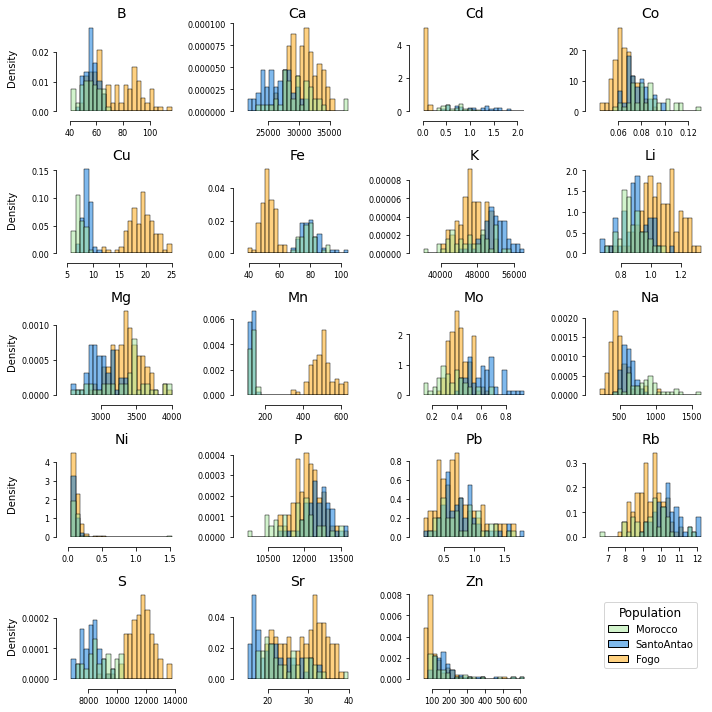

In [8]:
# colors=['#949494','#56B4E9','#ECE133']
colors=['#A7E99C','#0075DC','#FFA405']
elements = ['B','Ca','Cd','Co',
            'Cu','Fe','K','Li','Mg',
            'Mn','Mo','Na','Ni','P',
            'Pb','Rb','S','Sr','Zn']

from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
sns.set_palette(sns.color_palette(colors))

def plots(element,idx1,idx2):
    sns.histplot(data=df,
            x=element,
            hue='Population',
            stat="density",
            bins=23,
            ax=axes[idx1,idx2])
    axes[idx1,idx2].set_xlabel('')
    axes[idx1,idx2].set_ylabel('')
    axes[idx1,idx2].set_title(element,fontsize=14)
    axes[idx1,idx2].ticklabel_format(style='plain')
    axes[idx1,idx2].tick_params(labelsize=8)
    
    
fig,axes = plt.subplots(5,4,sharey=False,figsize=(10,10))
a,b=0,0
# for index, value in enumerate(elements):
for index in range(len(elements)):
    if index % 4 == 0:
        if index == 0:
            plots(elements[index],a,b)
            axes[a,b].set_ylabel('Density')
            axes[a,b].get_legend().remove()
            b+=1
        else:
            a+=1
            b=0
            plots(elements[index],a,b)
            axes[a,b].set_ylabel('Density')
            axes[a,b].get_legend().remove()
            b+=1
    elif index == 18:
        plots(elements[index],a,b)
        legend=axes[a,b].get_legend()
        handles = legend.legendHandles
        axes[a,b+1].legend(handles, ['Morocco', 'SantoAntao','Fogo'], title='Population',loc='center',
                           fontsize='medium',title_fontsize=12,frameon=True)
        axes[a,b+1].axis('off')
        axes[a,b].get_legend().remove()
        axes[a,b].xaxis.set_major_locator(ticker.MultipleLocator(100))
    elif index == 13:
        plots(elements[index],a,b)
        axes[a,b].get_legend().remove()
        axes[a,b].xaxis.set_major_locator(ticker.MultipleLocator(1500))
        b+=1
    elif index == 6:
        plots(elements[index],a,b)
        axes[a,b].get_legend().remove()
        axes[a,b].xaxis.set_major_locator(ticker.MultipleLocator(8000))
        b+=1
    elif index == 15:
        plots(elements[index],a,b)
        axes[a,b].get_legend().remove()
        axes[a,b].xaxis.set_major_locator(ticker.MultipleLocator(1))
        b+=1
    
    else:
        plots(elements[index],a,b)
        axes[a,b].get_legend().remove()
        b+=1
fig.align_ylabels(axes[:, ])
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("FigS3.png", format="png",
            bbox_inches="tight",facecolor="w", dpi=600)